In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
events_path = "../data/events.csv"
events = pd.read_csv(events_path)

### Parse Promotion Name

In [3]:
for index_label, row_series in events.iterrows():
    event_name = row_series["NAME"]
    promotion_name = event_name.split(" -",1)[0]
    
    # Check if last character is number
    if promotion_name[-1].isdigit():
        promotion_name = re.compile(r" [0-9]+$").split(promotion_name)[0]
        
    if promotion_name == "UFC Fight Night":
        promotion_name = "UFC"
        
    if promotion_name == "UFC on Fox":
        promotion_name = "UFC"
        
    if promotion_name == "PLMMA 61 / AFC":
        promotion_name = "PLMMA"
        
    if promotion_name == "UFC on Fuel TV":
        promotion_name = "UFC"
        
    if promotion_name == "UFC on ESPN":
        promotion_name = "UFC"
        
    if promotion_name == "UFC Live":
        promotion_name = "UFC"
        
    if promotion_name == 'M-1 Selection':
        promotion_name = "M-1"
        
    if promotion_name == 'M-1 Challenge':
        promotion_name = "M-1"
        
    if promotion_name == 'M-1 Global':
        promotion_name = "M-1"
    
    events.at[index_label , 'PROMOTION'] = promotion_name

In [4]:
events.head(10)

,NAME,DATE,PROMOTION
0,UFC 228 - Woodley vs. Till,Sep / 08 / 2018,UFC
1,UFC 220 - Miocic vs. Ngannou,Jan / 20 / 2018,UFC
2,UFC 218 - Holloway vs. Aldo 2,Dec / 02 / 2017,UFC
3,UFC Fight Night 109 - Gustafsson vs. Teixeira,May / 28 / 2017,UFC
4,UFC Fight Night 99 - Mousasi vs. Hall 2,Nov / 19 / 2016,UFC
5,LFC 61 - Legacy Fighting Championship 61,Oct / 14 / 2016,LFC
6,Rage in the Cage OKC 47 - Night of Champions,Aug / 13 / 2016,Rage in the Cage OKC
7,Bellator 143 - Warren vs. Davis,Sep / 25 / 2015,Bellator
8,RXMMA - Rocks Xtreme MMA 12,Feb / 28 / 2015,RXMMA
9,Bellator MMA - Bellator 111,Mar / 07 / 2014,Bellator MMA


### Join Events to Fights table

In [5]:
fights_path = "../data/fights.csv"
fights = pd.read_csv(fights_path)
fighters_path = "../data/fighters.csv"
fighters = pd.read_csv(fighters_path)
fighters['fighter_index'] = fighters.index

In [6]:
events_fights = pd.merge(events, fights, left_on='NAME', right_on='Event')
events_fights_fighters = pd.merge(events_fights, fighters, left_on="Fighter", right_on="NAME")
events_fights_fighters.head()

,NAME_x,DATE,PROMOTION,Event,Win/Loss/Draw,Fighter,Opponent,Method,Referee,Round,Time,Closed Odds,NAME_y,GYM,DOB,HEIGHT,WEIGHT,fighter_index
0,UFC 228 - Woodley vs. Till,Sep / 08 / 2018,UFC,UFC 228 - Woodley vs. Till,WIN,ABDUL RAZAK ALHASSAN,NIKO PRICE,KO (Punch),Jacob Montalvo,1,0:43,-130.0,ABDUL RAZAK ALHASSAN,NaN,1985-08-11,5'10',170 LBS,0
1,UFC 220 - Miocic vs. Ngannou,Jan / 20 / 2018,UFC,UFC 220 - Miocic vs. Ngannou,WIN,ABDUL RAZAK ALHASSAN,SABAH HOMASI,KO (Punch),Steve Rita,1,3:47,-250.0,ABDUL RAZAK ALHASSAN,NaN,1985-08-11,5'10',170 LBS,0
2,UFC 218 - Holloway vs. Aldo 2,Dec / 02 / 2017,UFC,UFC 218 - Holloway vs. Aldo 2,WIN,ABDUL RAZAK ALHASSAN,SABAH HOMASI,TKO (Punches),Herb Dean,1,4:21,NaN,ABDUL RAZAK ALHASSAN,NaN,1985-08-11,5'10',170 LBS,0
3,UFC Fight Night 109 - Gustafsson vs. Teixeira,May / 28 / 2017,UFC,UFC Fight Night 109 - Gustafsson vs. Teixeira,LOSS,ABDUL RAZAK ALHASSAN,OMARI AKHMEDOV,Decision (Split),Bobby Rehman,3,5:00,-300.0,ABDUL RAZAK ALHASSAN,NaN,1985-08-11,5'10',170 LBS,0
4,UFC Fight Night 99 - Mousasi vs. Hall 2,Nov / 19 / 2016,UFC,UFC Fight Night 99 - Mousasi vs. Hall 2,WIN,ABDUL RAZAK ALHASSAN,CHARLIE WARD,KO (Punch),Marc Goddard,1,0:53,-330.0,ABDUL RAZAK ALHASSAN,NaN,1985-08-11,5'10',170 LBS,0


### Loop through fighters and Add up UFC wins

In [7]:


for index_label, row_series in fighters.iterrows():
    fighter_name = fighters["NAME"].values[index_label]
    
    total_wins = len(events_fights[(events_fights.Fighter == fighter_name) & (events_fights["Win/Loss/Draw"] == "WIN")])
    total_losses = len(events_fights[(events_fights.Fighter == fighter_name) & (events_fights["Win/Loss/Draw"] == "LOSS")])

    ufc_wins = len(events_fights[(events_fights.Fighter == fighter_name) & (events_fights["Win/Loss/Draw"] == "WIN") & (events_fights['PROMOTION'] == "UFC")])
    ufc_losses = len(events_fights[(events_fights.Fighter == fighter_name) & (events_fights["Win/Loss/Draw"] == "LOSS") & (events_fights['PROMOTION'] == "UFC")])
    
    fighters.at[index_label , 'TOTAL_WINS'] = total_wins
    fighters.at[index_label , 'TOTAL_LOSSES'] = total_losses
    fighters.at[index_label , 'UFC_WINS'] = ufc_wins
    fighters.at[index_label , 'UFC_LOSSES'] = ufc_losses
    
fighters.head(10)

,NAME,GYM,DOB,HEIGHT,WEIGHT,fighter_index,TOTAL_WINS,TOTAL_LOSSES,UFC_WINS,UFC_LOSSES
0,ABDUL RAZAK ALHASSAN,NaN,1985-08-11,5'10',170 LBS,0,10.0,1.0,4.0,1.0
1,ABDUL-KERIM EDILOV,Akhmat Fight Team,1991-11-25,6'3',205 LBS,1,17.0,4.0,1.0,0.0
2,ABU AZAITAR,Team Azaitar,1986-03-10,5'9',185 LBS,2,14.0,1.0,1.0,0.0
3,ADAM MILSTEAD,Pittsburgh Fight Club,1987-07-03,6'3',205 LBS,3,9.0,3.0,1.0,2.0
4,ADAM WIECZOREK,AKS Chorzow,1992-02-05,6'5',232 LBS,4,10.0,2.0,2.0,1.0
5,ADAM YANDIEV,Fight or Die,1988-07-07,5'11',185 LBS,5,9.0,1.0,0.0,1.0
6,ADLAN AMAGOV,Jackson-Wink MMA,1986-10-30,5'11',170 LBS,6,15.0,3.0,2.0,0.0
7,AIEMANN ZAHABI,Tristar Gym,1987-11-19,5'8',135 LBS,7,7.0,2.0,1.0,2.0
8,AISLING DALY,SBG Ireland,1987-12-24,5'3',116 LBS,8,17.0,7.0,3.0,2.0
9,AL IAQUINTA,Serra-Longo Fight Team,1987-04-30,5'7',155 LBS,9,21.0,5.0,13.0,4.0


### Map promotions to fighters

##### Add an ASSOC_PROM column to each fighter with empty array

In [8]:
fighters['ASSOC_PROM'] = pd.np.empty((len(fighters), 0)).tolist()
fighters.head()

,NAME,GYM,DOB,HEIGHT,WEIGHT,fighter_index,TOTAL_WINS,TOTAL_LOSSES,UFC_WINS,UFC_LOSSES,ASSOC_PROM
0,ABDUL RAZAK ALHASSAN,NaN,1985-08-11,5'10',170 LBS,0,10.0,1.0,4.0,1.0,[]
1,ABDUL-KERIM EDILOV,Akhmat Fight Team,1991-11-25,6'3',205 LBS,1,17.0,4.0,1.0,0.0,[]
2,ABU AZAITAR,Team Azaitar,1986-03-10,5'9',185 LBS,2,14.0,1.0,1.0,0.0,[]
3,ADAM MILSTEAD,Pittsburgh Fight Club,1987-07-03,6'3',205 LBS,3,9.0,3.0,1.0,2.0,[]
4,ADAM WIECZOREK,AKS Chorzow,1992-02-05,6'5',232 LBS,4,10.0,2.0,2.0,1.0,[]


##### Map over events_fights_figthers. Map promotions into the fighter's array

In [9]:
for index_label, row_series in events_fights_fighters.iterrows():
    promotion = row_series['PROMOTION']
    fighter_index = row_series['fighter_index']
    assoc_prom = fighters.loc[fighter_index, 'ASSOC_PROM']
    if promotion not in assoc_prom: 
        assoc_prom.append(promotion)
        fighters.at[fighter_index, 'ASSOC_PROM'] = assoc_prom

### Add up wins and losses by promoters

In [10]:
promotions = {}

for index_label, row_series in fighters.iterrows():
    assoc_promotions = row_series['ASSOC_PROM']
    ufc_wins = row_series["UFC_WINS"]
    ufc_losses = row_series["UFC_LOSSES"]
    for promotion in assoc_promotions:
        if promotion not in promotions:
            promotions[promotion] = {"ufc_wins": ufc_wins, "ufc_losses": ufc_losses}
        if promotion in promotions: 
            promotions[promotion]["ufc_wins"] += ufc_wins
            promotions[promotion]["ufc_losses"] += ufc_losses
print(promotions)

{'UFC': {'ufc_wins': 3135.0, 'ufc_losses': 2113.0}, 'LFC': {'ufc_wins': 169.0, 'ufc_losses': 97.0}, 'Rage in the Cage OKC': {'ufc_wins': 8.0, 'ufc_losses': 2.0}, 'Bellator': {'ufc_wins': 44.0, 'ufc_losses': 34.0}, 'RXMMA': {'ufc_wins': 16.0, 'ufc_losses': 9.0}, 'Bellator MMA': {'ufc_wins': 106.0, 'ufc_losses': 81.0}, 'XKO': {'ufc_wins': 52.0, 'ufc_losses': 29.0}, 'WFCA': {'ufc_wins': 19.0, 'ufc_losses': 20.0}, 'Fight Nights': {'ufc_wins': 43.0, 'ufc_losses': 20.0}, 'ACB': {'ufc_wins': 38.0, 'ufc_losses': 26.0}, 'Absolute Championship Berkut': {'ufc_wins': 7.0, 'ufc_losses': 4.0}, 'CWFC': {'ufc_wins': 153.0, 'ufc_losses': 111.0}, 'DFC': {'ufc_wins': 27.0, 'ufc_losses': 21.0}, 'League S-70': {'ufc_wins': 24.0, 'ufc_losses': 4.0}, 'ProFC': {'ufc_wins': 72.0, 'ufc_losses': 30.0}, 'GFP': {'ufc_wins': 12.0, 'ufc_losses': 0.0}, 'M-1': {'ufc_wins': 130.0, 'ufc_losses': 66.0}, 'PAC': {'ufc_wins': 15.0, 'ufc_losses': 1.0}, 'WSOF': {'ufc_wins': 116.0, 'ufc_losses': 81.0}, 'GMC': {'ufc_wins': 6.0,

### Plot Wins by Promotion

<BarContainer object of 1620 artists>

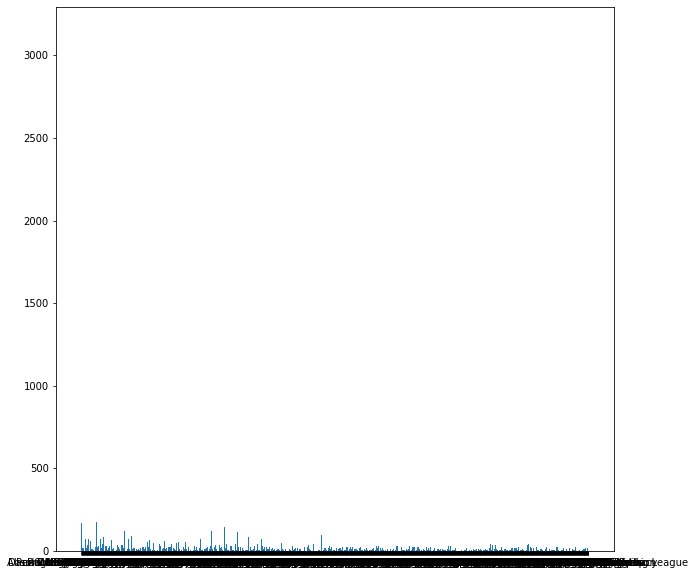

In [15]:
promotions_list = list(promotions.keys())
ufc_wins_list = []
for promtion, record in promotions.items():
    ufc_wins_list.append(record["ufc_wins"])

fig, axs = plt.subplots(1, figsize=(10, 10))
axs.bar(promotions_list, ufc_wins_list)